In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
np.random.seed(1337)
random.seed(1337)

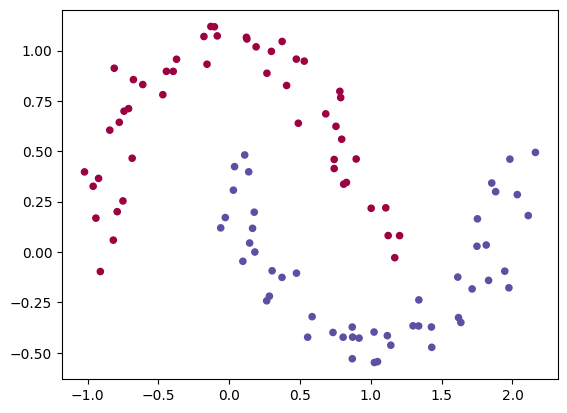

In [4]:
 # create train data
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)
# X.shape ((100,2)), y.shape((100,)), y in {0,1}

y= y*2 -1 # y in {-1,1}
#visualize the data
plt.scatter(X[:,0], X[:,1], c=y,s=20, cmap=plt.cm.Spectral)



In [5]:
# initialize a model
model = MLP(2, [16, 16, 1]) # 2 inputs, 2 hidden layers of size 16, 1 output
print(model)
print(model.parameters())

[Value(data=0.23550571390294128, grad=0.0), Value(data=0.06653114721000164, grad=0.0), Value(data=-0.26830328150124894, grad=0.0), Value(data=0.1715747078045431, grad=0.0), Value(data=-0.6686254326224383, grad=0.0), Value(data=0.6487474938152629, grad=0.0), Value(data=-0.23259038277158273, grad=0.0), Value(data=0.5792256498313748, grad=0.0), Value(data=0.8434530197925192, grad=0.0), Value(data=-0.3847332240409951, grad=0.0), Value(data=0.9844941451716409, grad=0.0), Value(data=-0.5901079958448365, grad=0.0), Value(data=0.31255526637777775, grad=0.0), Value(data=0.8246106857787521, grad=0.0), Value(data=-0.7814232047574572, grad=0.0), Value(data=0.6408752595662697, grad=0.0), Value(data=-0.20252189189007108, grad=0.0), Value(data=-0.8693137391598071, grad=0.0), Value(data=0.39841666323128555, grad=0.0), Value(data=-0.3037961142013801, grad=0.0), Value(data=-0.19282493884310759, grad=0.0), Value(data=0.6032250931493106, grad=0.0), Value(data=0.6001302646227185, grad=0.0), Value(data=0.32

In [6]:
# see how ma
print(list(map(lambda x:x**2, [1,2,3])))


[1, 4, 9]


In [7]:
# Loss function
def loss(batch_size=None):
    # inline dataloader
    if batch_size is None:
        Xb, yb = X, y
    else :
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    # forward pass to get scores 
    scores = list(map(model,inputs))

    # svm margin loss
    losses = [(1 + -ygt * yp).relu() for yp, ygt in zip(scores, yb)]
    
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p**2) for p in model.parameters())
    total_loss = data_loss + reg_loss

    # get accuracy 
    accuracy = [(yp.data > 0) == (ygt > 0) for yp, ygt in zip(scores, yb)]
    return total_loss, sum(accuracy) / len(accuracy)
total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.7840043023159258, grad=0.0) 0.68


In [8]:
# optimization 
for k in range(100):
    # forward pass
    total_loss, acc = loss()

    # zero grad
    model.zero_grad()
    # backward pass
    total_loss.backward()

    # update weights
    # learning rate decay
    learning_rate = 1.0 - 0.9 * k / 100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"epoch {k}: loss {total_loss.data}, accuracy {acc*100}%")

epoch 0: loss 0.7840043023159258, accuracy 68.0%
epoch 1: loss 0.5346887893624206, accuracy 73.0%
epoch 2: loss 0.40486112398826374, accuracy 83.0%
epoch 3: loss 0.3380828095624803, accuracy 86.0%
epoch 4: loss 0.29426189790330415, accuracy 88.0%
epoch 5: loss 0.2713707188453524, accuracy 90.0%
epoch 6: loss 0.2557758037037018, accuracy 90.0%
epoch 7: loss 0.24353269446140008, accuracy 91.0%
epoch 8: loss 0.23311666335881745, accuracy 91.0%
epoch 9: loss 0.22371429713875027, accuracy 91.0%
epoch 10: loss 0.21478840620418216, accuracy 91.0%
epoch 11: loss 0.2060314219010388, accuracy 91.0%
epoch 12: loss 0.19722264277587237, accuracy 92.0%
epoch 13: loss 0.18824544635214918, accuracy 93.0%
epoch 14: loss 0.17902966856680746, accuracy 94.0%
epoch 15: loss 0.1696750054539221, accuracy 94.0%
epoch 16: loss 0.1603343984865979, accuracy 94.0%
epoch 17: loss 0.1520098627872637, accuracy 96.0%
epoch 18: loss 0.14550876426551512, accuracy 96.0%
epoch 19: loss 0.15276142639895723, accuracy 95.0%

(-1.548639298268643, 1.951360701731357)

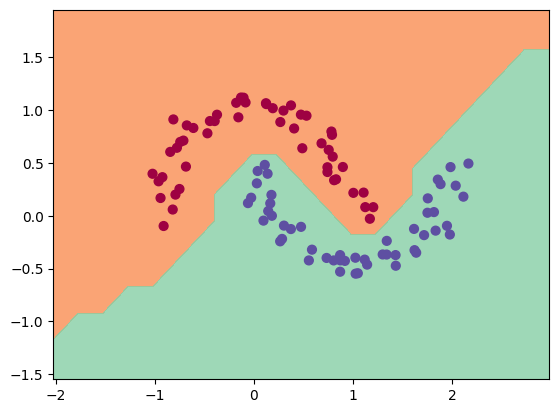

In [9]:
# visualize the decision boundary
h = 0.25 

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())